In [20]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv("rating_higher_than_3.7.csv")

In [45]:
data = data.fillna(0)

In [97]:
# only take first 3 flavors
data["temp"] = data["flavor"].map(lambda x: str(x).split(","))
data["need_flavor"] = data["temp"].map(lambda x: x[:3])

In [100]:
data.head(3)

,id,name,country,type_id,vintage_type,is_natural,acidity,fizziness,intensity,sweetness,tannin,flavor,rating_count,rating,temp,f_len,need_flavor
0,22550,Barolo,Italia,1,0,False,4.628600,0.0,3.797685,1.452786,4.346058,"earth,oak,red_fruit,black_fruit,spices,floral,...",19685,4.2,"[earth, oak, red_fruit, black_fruit, spices, f...",13,"[earth, oak, red_fruit]"
1,79282,Quimera,Argentina,1,0,False,3.737088,0.0,4.564072,1.717548,3.564157,"oak,black_fruit,earth,red_fruit,spices,floral,...",22440,4.2,"[oak, black_fruit, earth, red_fruit, spices, f...",12,"[oak, black_fruit, earth]"
2,7976,Viña Alberdi Reserva,España,1,0,False,3.759720,0.0,3.863433,1.543282,3.696991,"oak,earth,red_fruit,black_fruit,spices,microbi...",33094,4.1,"[oak, earth, red_fruit, black_fruit, spices, m...",13,"[oak, earth, red_fruit]"


Cinquanta Collezione has following characters:
* lower acidity than midium
* average fizziness
* higher intensity than midium
* higher sweetness than midium
* average tannin

In [32]:
data[data["name"].str.contains("Cinquanta")]

,id,name,country,type_id,vintage_type,is_natural,acidity,fizziness,intensity,sweetness,tannin,flavor,rating_count,rating
167,2459848,Cinquanta Collezione,Italia,1,1,False,2.236537,0.0,4.631876,3.009809,2.794085,"oak,black_fruit,red_fruit,earth,spices,dried_f...",29643,4.3


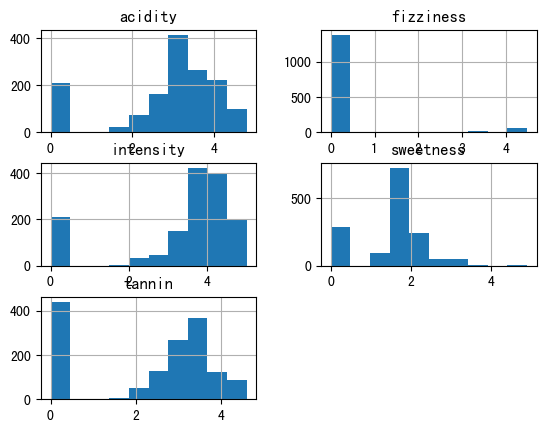

In [30]:
data[["acidity", "fizziness", "intensity", "sweetness", "tannin"]].hist()
plt.show()

In [103]:
need_data = data[["id", "name", "need_flavor"]]

In [104]:
explode = need_data.explode('need_flavor')

In [105]:
flavor_pivot_table = explode.pivot_table(index='id',columns='need_flavor',aggfunc='count')

In [106]:
flavor_pivot_table.to_csv("flavor_pivot_table.csv")

In [114]:
flavor = pd.read_csv("flavor_pivot_table.csv")
flavor = flavor.fillna(0)

In [115]:
flavor.head()

,id,black_fruit,citrus_fruit,dried_fruit,earth,floral,microbio,non_oak,oak,red_fruit,spices,tree_fruit,tropical_fruit,vegetal
0,1471,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1651,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1652,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1653,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1654,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [119]:
merged = data.merge(flavor, on="id")

In [123]:
merged.columns.to_list()

['id',
 'name',
 'country',
 'type_id',
 'vintage_type',
 'is_natural',
 'acidity',
 'fizziness',
 'intensity',
 'sweetness',
 'tannin',
 'flavor',
 'rating_count',
 'rating',
 'temp',
 'f_len',
 'need_flavor',
 'black_fruit',
 'citrus_fruit',
 'dried_fruit',
 'earth',
 'floral',
 'microbio',
 'non_oak',
 'oak',
 'red_fruit',
 'spices',
 'tree_fruit',
 'tropical_fruit',
 'vegetal']

In [144]:
final_need_data = merged.drop(["name", "type_id", "vintage_type", "flavor", "rating_count", 
                               "temp", "f_len", "need_flavor"], axis=1)

In [145]:
final_need_data["is_natural"] = final_need_data["is_natural"].astype("string")

In [149]:
final_need_data["is_natural"] = final_need_data["is_natural"].map(lambda x: "yes" if x == "True" else "no")

In [151]:
m = pd.get_dummies(final_need_data)

In [158]:
m_2 = data[["id", "name"]].merge(m)

In [163]:
features = m_2.drop(["id", "name", "rating"], axis=1)

In [165]:
features.head()

,acidity,fizziness,intensity,sweetness,tannin,black_fruit,citrus_fruit,dried_fruit,earth,floral,...,country_New Zealand,country_Portugal,country_România,country_South Africa,country_United States,country_Uruguay,country_Ελλάς,country_יִשְׂרָאֵל,is_natural_no,is_natural_yes
0,4.628600,0.000000,3.797685,1.452786,4.346058,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,3.737088,0.000000,4.564072,1.717548,3.564157,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,3.759720,0.000000,3.863433,1.543282,3.696991,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3.629755,0.000000,3.847361,1.830431,3.757694,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,4.530578,4.457622,4.028714,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [169]:
features.to_csv('features.tsv', sep='\t', index=None, header=None)

In [170]:
labels = m_2[["id", "name", "rating"]]

In [172]:
labels.to_csv('labels.tsv', sep='\t', index=None)

Begin to predict the ratings!

In [210]:
# fill the 0 in the data
import numpy as np
raw = m_2.replace(0., np.nan)

In [211]:
acidity_mean = raw["acidity"].mean()
raw["acidity"] = raw["acidity"].fillna(acidity_mean)

In [212]:
fizziness_mean = raw["fizziness"].mean()
raw["fizziness"] = raw["fizziness"].fillna(fizziness_mean)

In [213]:
intensity_mean = raw["intensity"].mean()
raw["intensity"] = raw["intensity"].fillna(intensity_mean)

In [214]:
sweetness_mean = raw["sweetness"].mean()
raw["sweetness"] = raw["sweetness"].fillna(sweetness_mean)

In [215]:
tannin_mean = raw["tannin"].mean()
raw["tannin"] = raw["tannin"].fillna(tannin_mean)

In [217]:
raw = raw.fillna(0)

In [218]:
raw.head()

,id,name,acidity,fizziness,intensity,sweetness,tannin,rating,black_fruit,citrus_fruit,...,country_New Zealand,country_Portugal,country_România,country_South Africa,country_United States,country_Uruguay,country_Ελλάς,country_יִשְׂרָאֵל,is_natural_no,is_natural_yes
0,22550,Barolo,4.628600,4.047446,3.797685,1.452786,4.346058,4.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,79282,Quimera,3.737088,4.047446,4.564072,1.717548,3.564157,4.2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7976,Viña Alberdi Reserva,3.759720,4.047446,3.863433,1.543282,3.696991,4.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1921801,Macán Clásico,3.629755,4.047446,3.847361,1.830431,3.757694,4.3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1141123,Vintage Brut Champagne,4.530578,4.457622,4.028714,1.895849,3.278184,4.3,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [262]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import MinMaxScaler

numeric = raw[["acidity", "fizziness", "intensity", "sweetness", "tannin"]]
normalized = (numeric - numeric.min()) / (numeric.max() - numeric.min())

In [267]:
raw_temp = raw.drop(["id", "name", "acidity", "fizziness", "intensity", "sweetness", "tannin"], axis=1)
all_norm = pd.concat([normalized, raw_temp], axis=1)

In [268]:
X = all_norm.drop(["rating"], axis=1)
y = all_norm[["rating"]]

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
# define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(900, activation="relu"),
    tf.keras.layers.Dense(400, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=200) 

Train on 1176 samples
Epoch 1/200
1176/1176 [==============================] - 1s 615us/sample - loss: 0.7339 - mae: 0.7339
Epoch 2/200
1176/1176 [==============================] - 0s 337us/sample - loss: 0.1978 - mae: 0.1978
Epoch 3/200
1176/1176 [==============================] - 0s 368us/sample - loss: 0.2103 - mae: 0.2103
Epoch 4/200
1176/1176 [==============================] - 0s 288us/sample - loss: 0.2178 - mae: 0.2178
Epoch 5/200
1176/1176 [==============================] - 0s 316us/sample - loss: 0.1947 - mae: 0.1947
Epoch 6/200
1176/1176 [==============================] - 0s 319us/sample - loss: 0.1943 - mae: 0.1943
Epoch 7/200
1176/1176 [==============================] - 0s 294us/sample - loss: 0.1576 - mae: 0.1576
Epoch 8/200
1176/1176 [==============================] - 0s 295us/sample - loss: 0.1722 - mae: 0.1722
Epoch 9/200
1176/1176 [==============================] - 0s 288us/sample - loss: 0.1719 - mae: 0.1719
Epoch 10/200
1176/1176 [==============================] - 0s

1176/1176 [==============================] - 0s 299us/sample - loss: 0.1295 - mae: 0.1295
Epoch 81/200
1176/1176 [==============================] - 0s 300us/sample - loss: 0.1273 - mae: 0.1273
Epoch 82/200
1176/1176 [==============================] - 0s 340us/sample - loss: 0.1413 - mae: 0.1413
Epoch 83/200
1176/1176 [==============================] - 0s 323us/sample - loss: 0.1530 - mae: 0.1530
Epoch 84/200
1176/1176 [==============================] - 0s 298us/sample - loss: 0.1300 - mae: 0.1300
Epoch 85/200
1176/1176 [==============================] - 0s 288us/sample - loss: 0.1472 - mae: 0.1472
Epoch 86/200
1176/1176 [==============================] - 0s 300us/sample - loss: 0.1339 - mae: 0.1339
Epoch 87/200
1176/1176 [==============================] - 0s 293us/sample - loss: 0.1500 - mae: 0.1500
Epoch 88/200
1176/1176 [==============================] - 0s 300us/sample - loss: 0.1332 - mae: 0.1332
Epoch 89/200
1176/1176 [==============================] - 0s 318us/sample - loss: 0.13

1176/1176 [==============================] - 0s 285us/sample - loss: 0.1229 - mae: 0.1229
Epoch 160/200
1176/1176 [==============================] - 0s 283us/sample - loss: 0.1187 - mae: 0.1187
Epoch 161/200
1176/1176 [==============================] - 0s 290us/sample - loss: 0.1412 - mae: 0.1412
Epoch 162/200
1176/1176 [==============================] - 0s 290us/sample - loss: 0.1265 - mae: 0.1265
Epoch 163/200
1176/1176 [==============================] - 0s 276us/sample - loss: 0.1351 - mae: 0.1351
Epoch 164/200
1176/1176 [==============================] - 0s 293us/sample - loss: 0.1276 - mae: 0.1276
Epoch 165/200
1176/1176 [==============================] - 0s 292us/sample - loss: 0.1280 - mae: 0.1280
Epoch 166/200
1176/1176 [==============================] - 0s 283us/sample - loss: 0.1282 - mae: 0.1282
Epoch 167/200
1176/1176 [==============================] - 0s 293us/sample - loss: 0.1253 - mae: 0.1253
Epoch 168/200
1176/1176 [==============================] - 0s 275us/sample - l

default: loss: 0.1208 - mae: 0.1208
bigger 1st fc size: loss: 0.1193 - mae: 0.1193
bigger 2nd fc size: loss: 0.1256 - mae: 0.1256
bigger bigger 1st fc size: loss: 0.1201 - mae: 0.1201
bigger bigger 2nd fc size: loss: 0.1183 - mae: 0.1183